# Plot photometry residuals

In [4]:
%matplotlib notebook

import itertools
import numpy as np

import astropy.io.ascii
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [9]:
# initial = astropy.io.ascii.read('/data/validate/jointcal-hsc/photometry_initial_chi2-0_i-meas.csv')
# final = astropy.io.ascii.read('/data/validate/jointcal-hsc/photometry_final_chi2-0_i-meas.csv')
initial = astropy.io.ascii.read('photometry_initial_chi2-0_r-meas.csv')
final = astropy.io.ascii.read('photometry_final_chi2-0_r-meas.csv')

visits = np.unique(final['visit']) # we'll need this later

## The basics

<IPython.core.display.Javascript object>


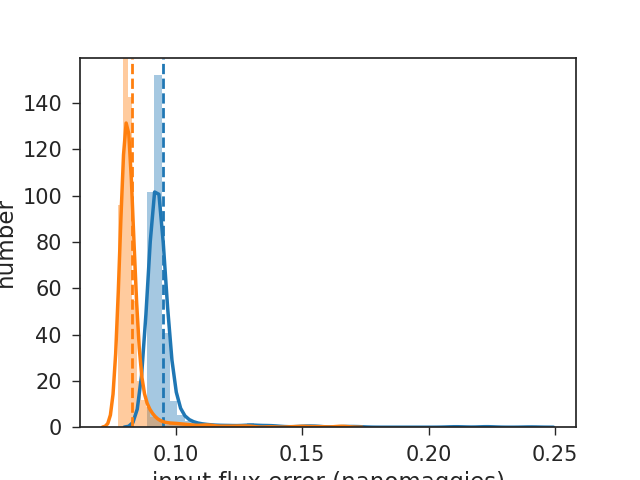

<IPython.core.display.Javascript object>


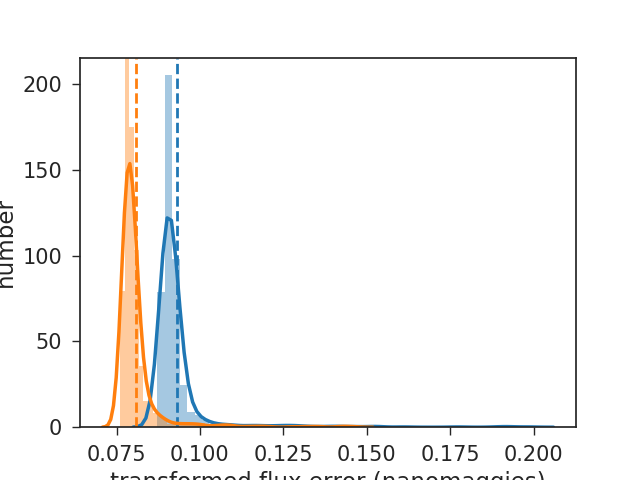

<IPython.core.display.Javascript object>


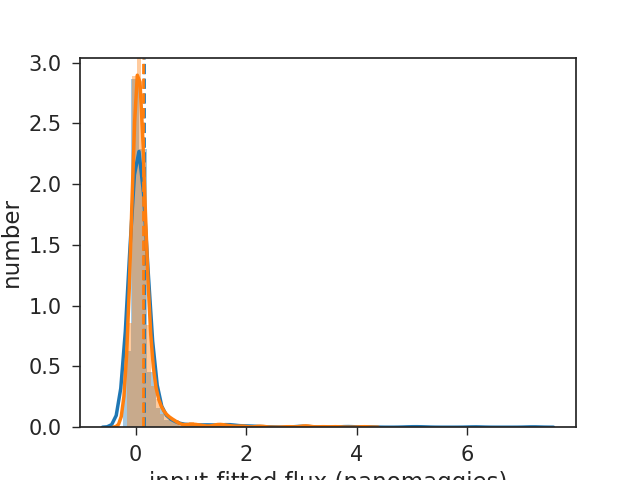

<IPython.core.display.Javascript object>


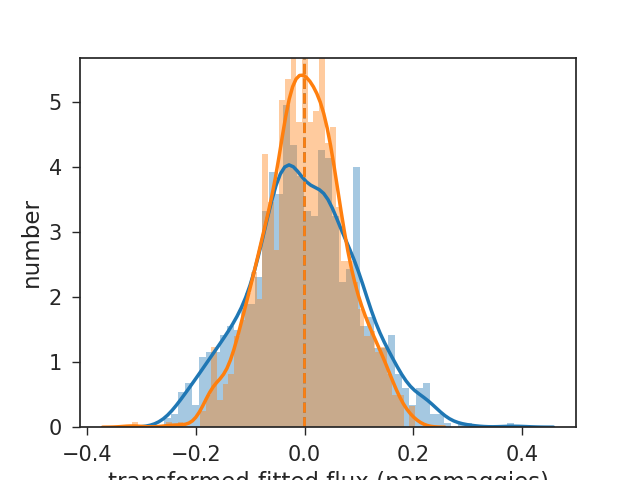

In [10]:
def make_hist(data, xlabel="VALUE (UNITS)", bins=50):
    plt.figure()
    palette = itertools.cycle(sns.color_palette())
    for visit in visits:
        test=final['visit']==visit
        color = next(palette)
        sns.distplot(data[test]*1e9, bins=50, color=color)
        plt.axvline(data[test].mean()*1e9, linestyle='dashed', linewidth=2, c=color)
    plt.xlabel(xlabel)
    plt.ylabel('number')

make_hist(final['inputFluxErr'], 'input flux error (nanomaggies)')
make_hist(final['transformedFluxErr'], 'transformed flux error (nanomaggies)')
make_hist(final['inputFlux']-final['fittedFlux'], 'input-fitted flux (nanomaggies)')
make_hist(final['transformedFlux']-final['fittedFlux'], 'transformed-fitted flux (nanomaggies)')

In [7]:
data=final['transformedFlux']-final['fittedFlux']*1e9
len(data)
(data < -1000).sum()
# make_hist(data, 'transformed-fitted flux (nanomaggies)')

648

## On-sky dependence

In [18]:
def plot_fluxes(data):
    visits = np.unique(data['visit'])
    deg_to_mas = 3.6e6
    size = 20
    cmap = 'RdBu'
    colormax = 0.3
    
    for visit in visits:
        cut = data[(data['visit'] == visit)]
        print("%d total, cut: %d, %d"%(visit, len(data), len(cut)))
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
        fig.subplots_adjust(wspace=0)
        axes[0].scatter(cut['ra'], cut['dec'], c=(cut['inputFlux']-cut['fittedFlux'])*1e9,
                        s=size, cmap=cmap, vmin=-colormax, vmax=colormax)
        axes[0].set_ylabel("dec")
        axes[0].set_xlabel("ra")
        ax = axes[1].scatter(cut['ra'], cut['dec'], c=(cut['transformedFlux']-cut['fittedFlux'])*1e9,
                             s=size, cmap=cmap, vmin=-colormax, vmax=colormax)
        axes[1].set_xlabel("ra")
        fig.suptitle('visit: %d'%visit)

        fig.subplots_adjust(right=0.9)
        cbar_ax = fig.add_axes([0.91, 0.15, 0.03, 0.7])
        cbar = fig.colorbar(ax, cbar_ax)
        cbar.set_label('flux delta (nanomaggies)', rotation=270)

849375 total, cut: 2310, 1145


<IPython.core.display.Javascript object>


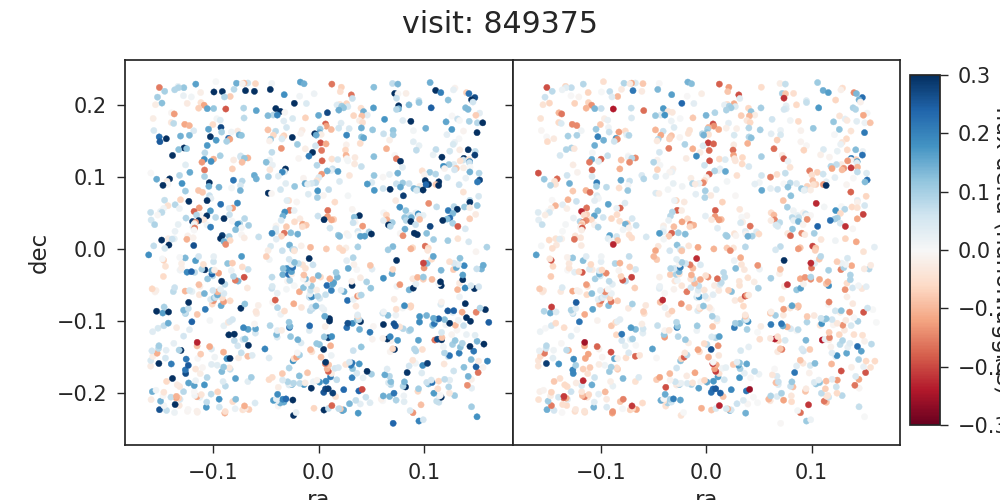

850587 total, cut: 2310, 1165


<IPython.core.display.Javascript object>


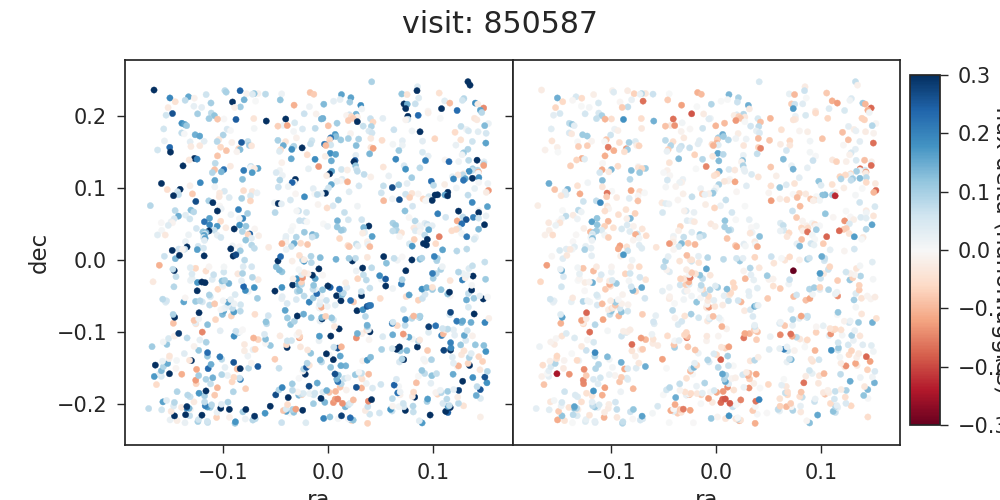

In [19]:
plot_fluxes(final)

In [6]:
final

id,#xccd,yccd,mag,instFlux,instFluxError,flux,fluxError,transformedFlux,transformedFluxErr,fflux,mjd,color,fsindex,ra,dec,chi2,nm,chip,visit
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,int64
10,904.01,54.3725,22.0105,10754.1,614.601,1.63967e-09,9.3709e-11,1.60206e-09,9.158e-11,1.49388e-09,53875.5,0,12,0.105684,0.231713,1.39534,2,12,849375
14,216.917,82.4907,20.9424,27417.8,625.544,4.18036e-09,9.53858e-11,4.08447e-09,9.32106e-11,4.10626e-09,53875.5,0,13,0.0700262,0.230424,0.0546568,2,12,849375
17,314.743,97.8574,21.3972,18545.0,621.934,2.82753e-09,9.483e-11,2.76267e-09,9.26726e-11,2.69235e-09,53875.5,0,14,0.0750945,0.229598,0.575692,2,12,849375
32,1358.12,200.388,21.7979,12250.6,605.532,1.86783e-09,9.23267e-11,1.82499e-09,9.02287e-11,1.88122e-09,53875.5,0,16,0.129238,0.224041,0.388365,2,12,849375
44,1330.79,248.672,21.7563,12929.2,603.964,1.97129e-09,9.20878e-11,1.92608e-09,8.99949e-11,1.94435e-09,53875.5,0,17,0.12781,0.221553,0.0412277,2,12,849375
47,1005.38,264.935,20.4347,44647.2,633.68,6.8073e-09,9.66423e-11,6.65115e-09,9.44229e-11,6.50157e-09,53875.5,0,18,0.110925,0.220786,2.50976,2,12,849375
61,1100.12,323.335,21.9416,11634.9,604.551,1.77396e-09,9.21768e-11,1.73326e-09,9.00824e-11,1.56538e-09,53875.5,0,19,0.115843,0.217746,3.47314,2,12,849375
63,1568.65,322.203,21.1888,21226.3,609.143,3.23635e-09,9.28813e-11,3.16211e-09,9.07667e-11,3.30696e-09,53875.5,0,20,0.140157,0.217691,2.54672,2,12,849375
66,258.496,350.343,19.3715,117510.0,673.915,1.79166e-08,1.0292e-10,1.75056e-08,1.00418e-10,1.74071e-08,53875.5,0,21,0.0721512,0.216541,0.962348,2,12,849375
